In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
%matplotlib inline

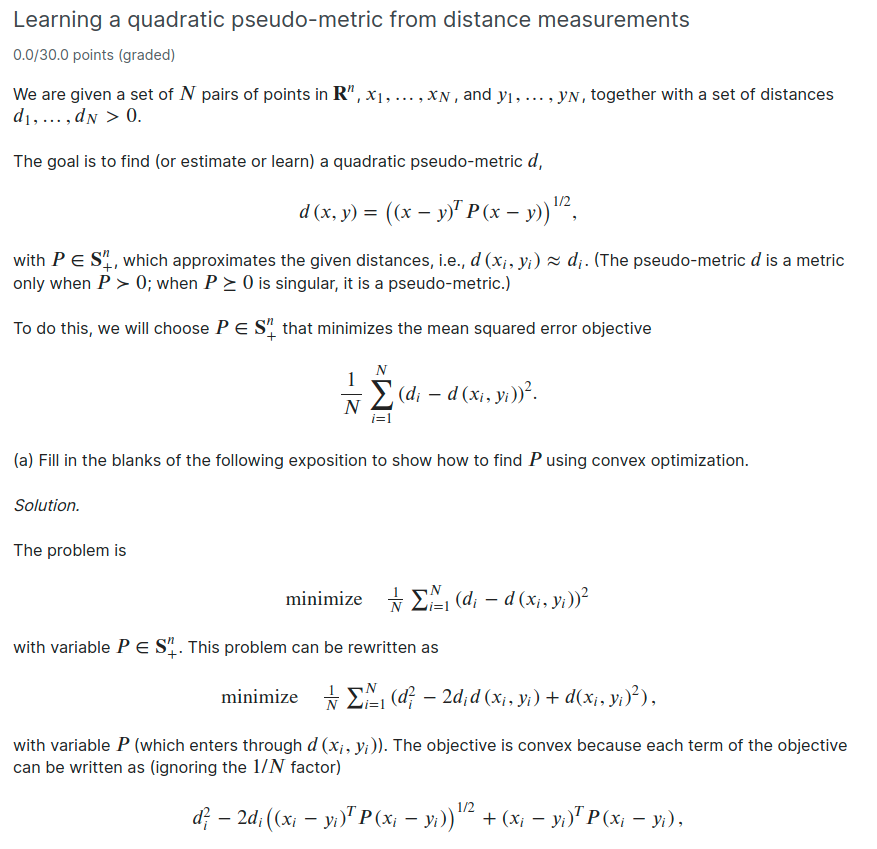

# Formulation

Let's define: 

$\Delta_i = x_i - y_i$  
$L_i = \Delta_i^T P \Delta_i$  

The problem is:

minimize $\sum -2 d_i (L_i)^{0.5} + L_i$  
s.t  
$P \succeq 0$



# Problem data

In [2]:
X = [
    [1.164954,1.696142,-1.446172,-0.360030,-0.044881,0.513478,0.375041,-0.322940,0.847649,-0.557094,-1.098195,-0.977814,-0.507700,-0.612911,1.133000,0.924159,0.394600,-0.137414,0.039885,-0.786457,-0.127443,-0.620214,-0.262681,0.499521,0.438705,0.292315,-0.759697,0.670292,-0.902031,0.846106,0.526163,0.889164,-1.010674,-1.406949,-0.165923,0.041430,-0.844414,0.336297,1.487524,0.786430,-0.702669,1.802440,-1.931134,-1.238566,1.547177,-2.526706,0.899884,-0.382918,-0.594524,1.879957,0.396727,-0.031243,0.251078,0.862500,0.968992,0.536007,1.524681,1.157783,-1.898778,-1.454749,0.418469,1.766708,-0.159448,-1.179060,-1.226502,0.658153,-0.397914,1.271743,-1.389722,-0.797533,-0.268286,1.939318,1.338814,0.420989,0.139860,-2.014986,-0.267458,0.605540,0.186747,0.434313,0.149996,1.136805,-1.378907,0.086932,-0.066596,0.642066,0.565239,-0.591204,0.393682,0.667201,-0.514013,1.289554,-0.227852,-0.904204,-1.586917,-0.047555,-0.391039,-0.956374,1.042360,-1.024905],
    [0.626839,0.059060,-0.701165,-0.135576,-0.798945,0.396681,1.125162,0.317988,0.268101,-0.336706,1.122648,-1.021466,0.885299,-0.209144,0.149994,-1.814115,0.639406,0.615770,-2.482843,0.634809,0.554172,0.237149,0.976490,-1.055375,-1.247344,2.565910,-0.674721,0.420146,-2.053257,-0.184538,-0.184454,-1.299152,-0.960498,1.030812,0.300907,-1.098050,-0.311630,-0.221361,-0.836821,-1.461639,0.356429,-0.642984,0.660300,-1.889236,0.644933,-0.312981,-0.200899,0.155083,0.130246,-1.003849,-0.527115,0.778212,-0.310471,-1.034706,-0.747317,0.298451,-0.195261,0.161908,1.822525,0.466546,0.247349,-0.382104,2.704026,-0.277776,0.069600,0.491314,0.864280,-0.035344,0.229328,-0.936741,-1.082140,-0.895840,1.222299,-0.433373,-0.748089,0.491717,-0.570245,-0.624481,1.594939,-0.386207,0.542038,0.391314,-0.260172,1.955674,0.373381,0.923087,-0.610781,1.691546,-0.905427,-0.067794,1.896261,-0.530575,0.376770,0.698670,-0.920783,-0.614736,-1.382045,0.451807,1.209120,-1.056846],
    [0.075080,1.797072,1.245982,-1.349338,-0.765172,0.756219,0.728642,-0.511172,-0.923489,0.415227,0.581667,0.317688,-0.248094,0.562148,0.703144,0.034973,0.874213,0.977894,1.158655,0.820410,-1.097344,-1.586847,0.977815,-0.450743,0.324667,-0.457816,-1.171687,-2.872751,0.089086,1.030714,0.198783,1.182573,0.691160,-0.759874,-0.322467,1.566724,0.397810,0.016649,-1.300982,1.554466,0.652636,0.109555,-1.102510,-0.973585,-2.148359,-0.593618,-0.233735,-0.964648,0.035014,-0.497446,0.344571,2.180484,-0.923004,-0.192673,-2.796024,0.284043,0.017260,1.557064,-1.518415,0.545437,0.704110,-0.911425,-0.198500,-1.581053,-0.396516,0.800734,-0.177618,-1.501329,0.271190,-0.002433,2.014134,-0.304158,-1.595978,0.706252,-0.628975,-1.554975,-0.187267,0.572228,0.321307,-0.112564,0.254409,1.605148,0.994768,0.161454,0.217314,-1.555108,1.231111,0.953356,-1.274473,-1.735660,-0.253230,-0.692971,1.221556,0.482598,-0.614274,0.240362,1.076292,-1.253778,0.780955,2.887723],
    [0.351607,0.264069,-0.638977,-1.270450,0.861735,0.400486,-2.377454,-0.002041,-0.070499,1.557814,-0.271354,1.516108,-0.726249,-1.063923,-0.052412,-1.807862,1.752402,-1.115348,-1.026279,-0.176027,-0.731301,-0.401485,1.170021,1.270378,0.390070,-1.610827,2.032930,1.685874,2.087099,-1.527623,1.590427,1.817472,-0.758618,0.874127,-0.368411,-1.048423,1.049786,-1.192361,1.574132,-0.597535,0.215671,-0.719038,-0.102971,0.212116,-1.028845,0.332322,1.449907,0.038756,-0.624674,-1.504397,-0.723291,0.437814,-0.384776,-1.299723,0.696732,0.959664,0.246340,-0.193544,-1.051071,1.320319,0.631939,-0.996090,-0.141405,1.049022,1.388807,-0.767269,1.874381,0.365373,-0.366360,0.396086,1.944031,0.555253,-1.067730,0.227857,1.394831,-0.140609,1.208557,-0.724410,0.866841,-0.964333,-0.307241,0.825892,1.834034,-0.628688,-0.179457,0.663594,0.994300,-1.930055,0.346546,0.806349,-0.174531,-0.859806,1.098288,0.811696,-0.334672,0.125017,1.269466,0.256435,-1.179900,-0.267744],
    [-0.696513,0.871673,0.577350,0.984570,-0.056225,-1.341381,-0.273782,1.606511,0.147891,-2.444299,0.414191,0.749432,-0.445040,0.351589,2.018496,1.028193,-0.320051,-0.550021,1.153487,0.562474,1.404732,-0.770692,0.159311,0.898694,-0.405138,-2.669524,0.968481,0.027925,0.365118,0.964939,0.032192,-0.584302,-0.096972,0.761127,1.147895,0.422724,-0.340796,-0.131646,1.166040,-1.210568,-0.263896,0.420628,-1.059802,0.493442,-0.141582,0.558851,1.836132,0.765458,-0.539775,-0.095449,1.268193,1.333329,1.158181,0.306596,3.206908,2.087593,-0.854485,1.651301,0.049931,-0.404494,-0.992362,1.195143,0.411268,0.302689,1.364422,0.364420,0.172400,-0.198660,1.376960,-0.508693,-1.521529,-0.324247,-0.759919,-1.016992,-1.647691,0.244944,-0.638855,1.192196,1.291844,-2.057251,-0.417112,1.470390,-1.715910,-1.438824,0.025673,-0.609500,-0.803475,0.512845,-1.195235,-0.914801,0.978788,0.529038,-0.853014,0.327883,0.080345,-0.223605,0.487268,0.421229,1.001450,-0.488540],
    ]

Y = [
    [0.419420,-0.611729,-0.506138,-2.122378,-0.673263,-1.350292,0.202680,0.186106,1.408075,0.179925,-0.683631,0.450343,-0.201343,-0.906374,-0.179097,0.067372,1.177170,1.173296,-0.574005,-0.081630,1.662312,1.166705,-0.960461,-0.915962,0.427947,0.213963,0.261843,0.144555,-0.972946,-0.534127,-0.310909,-1.719190,-0.345134,-0.785496,-0.275569,-0.744296,2.680118,-0.583258,-2.068566,0.385524,0.610146,-0.226541,0.263481,-0.988875,-0.130638,-1.266094,-0.768533,1.100780,-0.328912,-1.555024,0.698124,1.361879,-1.159160,-1.450383,-1.304731,1.000335,0.125589,-0.260304,-1.212525,-0.265477,-1.474263,-2.366324,1.195417,1.966075,2.955089,-1.133640,-2.032843,-0.902634,-1.327697,0.323356,0.096060,-0.875772,-1.672760,-1.548104,-0.426525,1.189467,0.750603,-1.340946,-0.876102,0.982860,0.016264,-0.934128,0.660062,0.131692,1.855048,-0.835704,-1.685751,-0.632046,1.599021,-0.245918,1.132966,-0.997240,-0.242387,0.082218,0.836056,-2.938220,1.116575,0.750101,-1.146451,-0.040269],
    [-0.742745,0.100402,-0.983137,-0.850378,0.989850,0.092861,-0.421487,0.667174,-1.476422,0.029963,0.813277,-0.119641,-1.236394,-0.515380,0.168926,0.184150,-1.298539,1.611950,1.362962,-1.223518,-0.256088,-0.659430,0.130287,1.490409,0.357348,0.100046,-0.440424,0.810685,1.150638,0.688182,0.177537,0.090665,-1.015168,-0.242882,2.150379,-0.200403,-0.384886,-1.039926,1.674866,-0.784288,0.478515,1.329307,0.647336,1.036852,0.015360,1.299368,1.038744,-0.393357,1.739255,0.853390,0.623186,-0.105752,1.466680,0.475028,0.443241,-0.010695,1.233429,1.302974,0.593773,1.787029,0.268053,-0.869979,-1.700570,-2.301185,1.874092,0.462473,0.564390,1.279284,0.786037,0.615560,-0.395321,0.665887,-0.027883,0.612520,-0.508498,-0.363852,0.547452,0.181441,-1.256036,1.333580,-1.287073,0.035241,-1.229566,1.644603,2.084384,-1.018327,0.358190,0.783785,0.990909,1.646456,-0.492347,1.105070,-0.445072,0.732257,-1.958656,-1.104897,-1.372281,-0.728689,1.365443,-0.281505],
    [0.572912,-1.112905,-0.437222,-0.424095,-0.577293,1.390198,1.218891,-0.429976,-0.809376,-0.711098,0.137012,0.299881,0.576187,1.181516,0.796552,-0.056014,-0.410115,2.318210,1.148564,-1.084040,-0.807258,0.385522,0.893410,2.148636,-0.513751,0.721376,-1.816264,-0.617132,0.042902,1.722587,-0.976696,1.660189,0.805136,-0.020406,-1.161508,-0.276941,-0.057147,-1.398089,-0.582561,0.384008,0.620631,-1.655171,0.814268,-0.057835,-0.673946,0.531241,0.639814,-0.222340,-1.587151,-0.779175,0.625826,-2.359716,0.255200,-0.586808,-0.400561,-0.832345,1.059862,-1.358675,0.597249,0.034741,1.765786,-0.699984,-0.585549,-0.994563,0.109977,-0.046205,1.156908,-0.346535,1.117178,-1.723877,-1.651466,0.937835,0.438835,0.193465,0.241914,-0.228302,-1.737480,0.030161,-0.269798,-0.926771,-1.553320,1.576796,-0.570628,-0.236055,-0.227784,-0.945054,-0.671933,0.240538,0.066988,1.561130,-0.336589,-1.148196,0.748184,-0.962436,-0.779537,-1.547502,2.074836,-0.648186,-0.632439,-1.227824],
    [-0.143680,0.957172,1.640728,-1.029596,-1.278514,0.153271,-1.751493,-1.146584,-0.196892,0.456901,0.403788,0.643104,0.933544,0.200532,-0.464512,0.674326,-1.847284,-0.814667,-0.378804,-0.440653,-0.077400,-0.187585,0.348338,1.129853,-0.086701,0.091444,0.528719,-1.191801,0.664119,-1.273178,-0.765922,-0.653223,-1.287555,-1.440631,-0.001266,-0.975253,-1.728765,0.844010,-0.785796,0.839488,-1.770459,-0.060916,-0.709093,-0.823255,-0.525083,-0.719614,-0.661728,-0.259005,1.013978,0.844147,-1.408990,-0.777909,-0.146252,0.305144,-0.621204,-1.181208,-1.755407,0.359975,-0.294485,0.325478,-1.768180,0.859512,2.205565,0.106741,-1.372973,-1.298474,1.253641,0.081997,-0.540079,1.241964,-1.098188,1.563100,0.800308,-1.093574,-0.408954,-0.824891,-0.296406,0.381845,-0.732456,1.154125,-0.059866,-1.532254,-0.682228,-0.706986,-0.265914,-0.865398,-1.021033,-1.470454,1.993145,-0.758432,0.059077,-0.473563,-2.271209,0.876035,1.224104,-1.434385,1.485758,0.138927,1.959653,1.159358],
    [-0.156844,-0.577886,0.530367,-0.349036,0.281387,0.801381,2.945547,-1.873306,-1.127700,-1.077242,1.288723,-1.775968,1.131390,-0.364330,-0.814449,2.557545,-0.899062,0.853069,-2.380476,-1.522343,-1.595641,-1.598445,0.760433,-1.434479,-0.668682,-0.002400,-0.351920,-2.082037,1.577989,-1.126164,-2.372749,2.050284,2.145294,0.780599,-1.142249,0.397122,1.280767,0.248825,-0.594914,0.471760,-0.351909,-0.470341,-0.669992,1.956099,0.711471,-0.107439,-0.170603,-1.262057,1.207766,-0.643000,-1.170419,-0.059081,-0.108548,1.017417,1.200154,-0.766562,-0.554640,1.314540,-0.935959,0.565107,1.627511,-1.296415,-0.827220,1.375143,-1.354662,0.080468,0.309434,-1.756170,-0.920435,0.568060,-1.103339,-0.756307,-0.974407,0.977825,-1.021484,0.610675,-0.369597,1.463439,0.279208,2.135796,0.582646,-0.254342,0.254562,-0.588331,-0.021790,-0.808710,2.498869,0.334877,-0.633251,-0.903983,-0.991926,0.333565,-1.080591,-0.633172,0.576336,0.128015,-0.043598,-0.153634,0.431631,-1.274743],
    ]

X_test = [
    [-0.186647,-0.636795,-0.242266,-1.000994,-1.094656,-0.088627,0.357200,1.236353,-0.657828,-1.081924],
    [-2.001022,0.007438,0.545292,1.134810,1.258890,-0.459909,1.365078,-1.397270,-0.864847,0.965412],
    [-1.028858,-0.002620,1.980639,0.758663,0.336024,-0.261001,-0.718739,-1.722115,-2.186815,0.701975],
    [0.545433,0.056516,0.111102,0.291716,1.496372,0.085050,0.415523,-1.234309,-0.785680,-1.487673],
    [0.224813,-1.022040,3.533658,2.245274,-0.665822,-0.009841,0.179097,0.494105,-0.905888,-0.197859],
    ]

Y_test = [
    [-0.294687,-0.689915,-2.285898,-0.938975,0.035156,-0.430063,0.352267,-0.385081,-0.752931,-0.014699],
    [-0.222314,0.699612,-0.264101,-0.767007,-0.183959,1.502923,-0.280606,1.081048,0.391797,-0.011185],
    [1.801455,0.772426,-0.945537,0.322200,0.057886,0.579556,0.961475,-1.396751,0.404377,-0.063508],
    [-0.133797,0.497607,0.310190,0.612367,-0.926959,-0.457190,1.309079,-1.575387,-1.116767,-1.027934],
    [-2.243783,0.391663,0.852659,0.069602,2.284313,-0.057675,-1.306810,-0.515741,-1.484789,0.988259],
    ]

d = [3.105698,9.303920,6.834464,8.535880,6.895867,2.084421,5.802307,6.078630,7.676743,7.889291,1.747867,5.421094,8.056460,5.403059,6.134915,9.260686,11.292909,6.465282,12.659127,6.716904,8.247420,7.677115,2.345364,10.289954,7.556104,9.927747,2.885653,8.667243,10.105910,8.164997,4.403754,10.905269,6.736946,7.881454,9.098149,5.616785,13.511874,8.607833,10.158668,7.828967,6.669338,10.942197,7.102851,12.512170,1.693926,5.316018,6.161766,7.008868,8.568092,13.728702,4.080557,10.282838,6.515821,11.142170,8.083361,4.659479,7.252958,11.903167,9.148000,7.844158,7.144369,12.485157,16.621630,13.365911,10.855162,4.169473,3.658437,6.554199,5.956399,6.189959,15.132870,8.958080,11.450199,6.767207,6.598192,8.818651,8.531837,5.173845,8.337579,10.310235,6.315191,1.352438,12.100806,2.871881,5.391262,5.899694,12.221590,4.330038,5.430671,8.585915,9.817138,8.901824,9.322942,3.233721,4.747448,5.238966,4.640416,5.379597,11.164867,10.616969]

d_test = [7.600672,4.423181,9.997974,8.315172,12.786013,7.426758,11.055029,8.688143,6.585704,4.253190]

X = np.array(X)
Y = np.array(Y)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
d = np.array(d)
d_test = np.array(d_test)

print('Shapes X,Y,d     :', X.shape , Y.shape , d.shape)
print('Shapes X,Y,d test:',X_test.shape, Y_test.shape, d_test.shape)


Shapes X,Y,d     : (5, 100) (5, 100) (100,)
Shapes X,Y,d test: (5, 10) (5, 10) (10,)


# Solving

In [3]:
n, m = X.shape
delta = X - Y
P = cp.Variable((n,n), PSD = True)

error = 0
for i in range(m):
    delta_i = delta[:,i]    
    L_i = cp.quad_form(delta_i, P)
    error += -2 * d[i] * cp.sqrt(L_i) + L_i + d[i]**2

error /= m

obj = cp.Minimize(error)
prob = cp.Problem(obj)
prob.solve()
assert prob.status == cp.OPTIMAL

print("P:")
print(P.value)

print('error:', error.value)

P:
[[ 2.26464003 -1.9475781   1.15590301 -3.25890379  1.35192478]
 [-1.9475781  10.01318959 -2.6741022  -0.82386697  1.52377243]
 [ 1.15590301 -2.6741022   6.56787414 -0.02362736 -1.99879119]
 [-3.25890379 -0.82386697 -0.02362736  6.46300341 -3.17875458]
 [ 1.35192478  1.52377243 -1.99879119 -3.17875458  4.08824336]]
error: 0.8866886849961493


In [4]:
def get_error(P, X, Y, d_true):
    delta = X - Y
    return ((np.sum((P @ delta) * delta, axis = 0)**0.5 - d_true)**2).mean()

In [5]:
get_error(P.value, X, Y, d).round(2)

0.89

In [6]:
get_error(P.value, X_test, Y_test, d_test).round(2)

0.83